In [17]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [18]:
AS = pd.read_csv('ApplianceShipments.csv', squeeze = True)

In [19]:
AS.head()

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123


In [20]:
AS.shape

(20, 2)

In [21]:
AS['Quarter'].unique()

array(['Q1-1985', 'Q2-1985', 'Q3-1985', 'Q4-1985', 'Q1-1986', 'Q2-1986',
       'Q3-1986', 'Q4-1986', 'Q1-1987', 'Q2-1987', 'Q3-1987', 'Q4-1987',
       'Q1-1988', 'Q2-1988', 'Q3-1988', 'Q4-1988', 'Q1-1989', 'Q2-1989',
       'Q3-1989', 'Q4-1989'], dtype=object)

In [22]:
AS['Year'] = AS['Quarter'].str[-4:]


In [23]:
AS['Q'] = AS['Quarter'].str[:2]

In [24]:
AS

,Quarter,Shipments,Year,Q
0,Q1-1985,4009,1985,Q1
1,Q2-1985,4321,1985,Q2
2,Q3-1985,4224,1985,Q3
3,Q4-1985,3944,1985,Q4
4,Q1-1986,4123,1986,Q1
5,Q2-1986,4522,1986,Q2
6,Q3-1986,4657,1986,Q3
7,Q4-1986,4030,1986,Q4
8,Q1-1987,4493,1987,Q1
9,Q2-1987,4806,1987,Q2


In [25]:
AS['Shipments'].min()

3944

In [26]:
AS['Shipments'].max()

4900

In [27]:
pattern_ts = pd.Series(AS.Shipments.values, index = AS.Quarter)

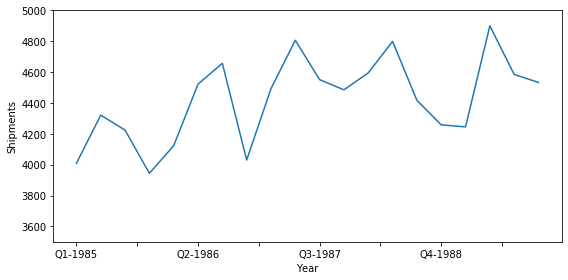

In [28]:
pattern_ts.plot(ylim = [3500, 5000], figsize = [8, 4])
plt.xlabel('Year')
plt.ylabel('Shipments')
plt.tight_layout()
plt.show()

There appears to be a quarterly pattern between 1985 and 1989. Q2 has the highest shipment throughout the years considered and shipment always dip at the end of Q4. 

Text(0, 0.5, 'Shipments')

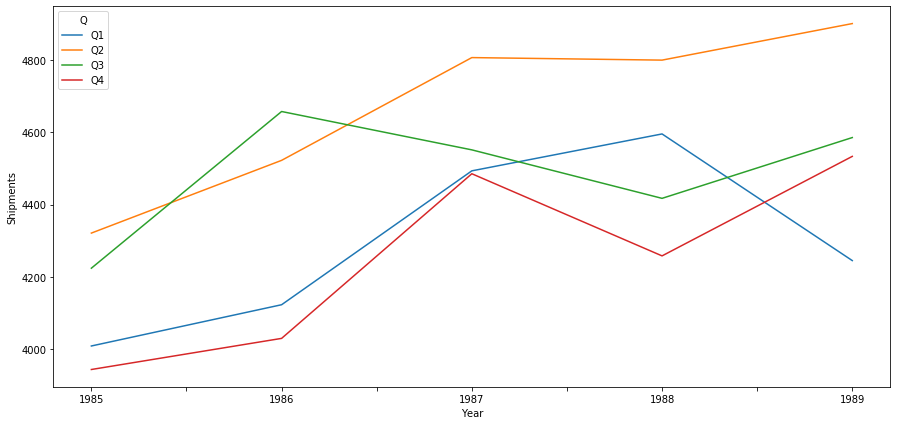

In [29]:
fig, ax = plt.subplots(figsize = (15,7))
AS.groupby(['Year', 'Q']).sum()['Shipments'].unstack().plot(ax=ax)
ylim = [3500, 5000]
plt.ylabel('Shipments')

From the chart above, there appears to be a difference between quarters. The both similar quarters are Q2 and Q4 between 1985 and 1989.

In [30]:
pv = AS.groupby(['Year']).sum()['Shipments']

In [31]:
pv.head()

Year
1985    16498
1986    17332
1987    18335
1988    18069
1989    18263
Name: Shipments, dtype: int64

Text(0, 0.5, 'Shipments')

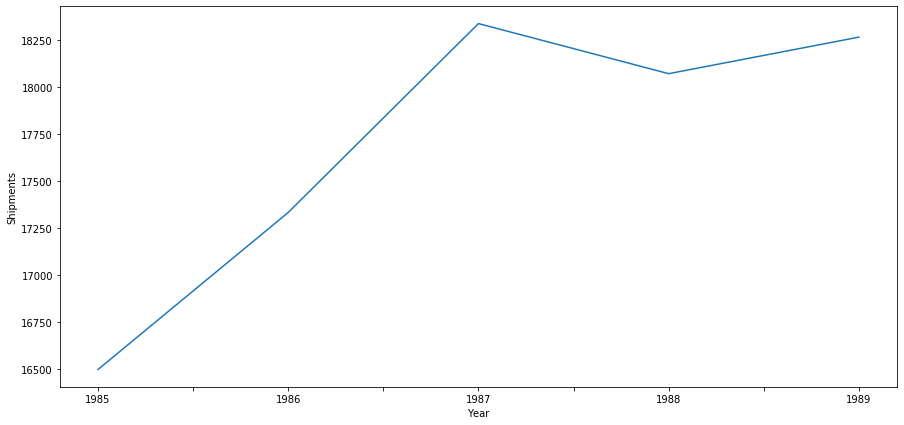

In [32]:
fig, ax = plt.subplots(figsize = (15,7))
AS.groupby(['Year']).sum()['Shipments'].plot(ax=ax)
plt.ylabel('Shipments')